In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

SEED = 42
np.random.seed(SEED)

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Data/Best_Books_Ever.csv')  # Inputs/Indep variables
df_data.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/1960,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,1E+13,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78032E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/2005,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [ ]:
print(df_data.drop(df_data[df_data.genres.str.contains(r'[^0-9a-zA-Z]') |
                 df_data.author.str.contains(r'[^0-9a-zA-Z]') |
                 df_data.title.str.contains(r'[^0-9a-zA-Z]') |
                 df_data.language.str.contains(r'[^0-9a-zA-Z]')].index))

Empty DataFrame
Columns: [bookId, title, series, author, rating, description, language, isbn, genres, characters, bookFormat, edition, pages, publisher, publishDate, firstPublishDate, awards, numRatings, ratingsByStars, likedPercent, setting, coverImg, bbeScore, bbeVotes, price]
Index: []

[0 rows x 25 columns]


In [ ]:
#df_data['genres'] = df['genres'].str.replace(r'\D', '')
#df_data['genres'] = df['genres'].str.replace(r'\D', '')
df_data.head(2)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38


In [ ]:
df_data.isna().sum()


bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [ ]:
df_data = df_data.dropna()

In [ ]:
df_data.isna().sum()


bookId              0
title               0
series              0
author              0
rating              0
description         0
language            0
isbn                0
genres              0
characters          0
bookFormat          0
edition             0
pages               0
publisher           0
publishDate         0
firstPublishDate    0
awards              0
numRatings          0
ratingsByStars      0
likedPercent        0
setting             0
coverImg            0
bbeScore            0
bbeVotes            0
price               0
dtype: int64

In [ ]:
df_data = df_data.drop_duplicates()

Intial EDA & Data preparation

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 1 to 52403
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            796 non-null    object 
 1   title             796 non-null    object 
 2   series            796 non-null    object 
 3   author            796 non-null    object 
 4   rating            796 non-null    float64
 5   description       796 non-null    object 
 6   language          796 non-null    object 
 7   isbn              796 non-null    object 
 8   genres            796 non-null    object 
 9   characters        796 non-null    object 
 10  bookFormat        796 non-null    object 
 11  edition           796 non-null    object 
 12  pages             796 non-null    object 
 13  publisher         796 non-null    object 
 14  publishDate       796 non-null    object 
 15  firstPublishDate  796 non-null    object 
 16  awards            796 non-null    object 


### Step 2: EDA & Data Preprocessing
* What values do you see?
* What distributions do you see?
* What relationships do you see?
* What relationships do you think might benefit the prediction problem?
* What ideas about the domain does the data spark?

In [ ]:
df_data.columns


Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [ ]:
df_data.sample(5)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
44190,6934543,أزهار للسيدة هاريس,Mrs. 'Arris #1,Paul Gallico,3.89,أزهار للسيدة هاريس Flowers for Mrs Harris، الت...,Arabic,9.78156E+12,"['Fiction', 'Humor', 'France', 'Classics', 'Br...",[],...,11/06/1958,[],2109,"['615', '831', '520', '107', '36']",93.0,[],https://i.gr-assets.com/images/S/compressed.ph...,71,1,9.32
50835,9314426-steal-the-dragon,Steal the Dragon,Sianim #2,Patricia Briggs,3.96,"A SLAVE ON THE RUNWhen Rialla was young, slave...",English,9.78044E+12,"['Fantasy', 'Fiction', 'Romance', 'Magic', 'Pa...",[],...,November 1st 1995,[],6387,"['2027', '2439', '1630', '252', '39']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,27,1,3.83
1250,321645.Kissed_by_an_Angel_The_Power_of_Love_So...,Kissed by an Angel/The Power of Love/Soulmates,Kissed by an Angel #1-3,Elizabeth Chandler,4.08,An angelic romantic suspense trilogy in one vo...,English,9.78067E+12,"['Young Adult', 'Romance', 'Angels', 'Fantasy'...",[],...,10/28/95,[],25334,"['11595', '6889', '4704', '1488', '658']",92.0,[],https://i.gr-assets.com/images/S/compressed.ph...,4306,56,5.92
27404,214641.Don_Quijote_de_la_Mancha_II,Don Quijote de la Mancha II: Segunda Parte del...,Don Quijote de la Mancha #2,"Miguel de Cervantes Saavedra, G. Roux (Illustr...",4.19,Hace más de un cuarto de siglo que Ediciones C...,Spanish,9.78844E+12,"['Classics', 'Fiction', 'Spanish Literature', ...","['Sancho Panza', 'Don Quijote de la Mancha', '...",...,10/30/15,[],3567,"['1773', '981', '589', '163', '61']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,97,1,4.5
1307,20758103-the-ask-and-the-answer,The Ask and the Answer,Chaos Walking #2,Patrick Ness,4.20,"We were in the square, in the square where I'd...",English,9.78076E+12,"['Young Adult', 'Science Fiction', 'Dystopia',...","['Todd Hewitt', 'Viola Eade', 'Mayor Prentiss'...",...,05/04/2009,['Locus Award Nominee for Best Young Adult Nov...,73293,"['33193', '25930', '10753', '2385', '1032']",95.0,['New World'],https://i.gr-assets.com/images/S/compressed.ph...,4060,47,6.96


In [ ]:
def f(row):
    if row['rating'] > 4.9:
        place = 1
    elif row['rating'] > 4.5:
        place = 2

    elif row['rating'] > 4.0:
        place= 3
    elif row['rating'] > 3.9:
        place = 4
    elif row['rating'] < 3.0:
        place = 5

    else:
        place = 0
    return place

#create new column 'Good' using the function above
df_data['top_rated'] = df_data.apply(f, axis=1)

df_data.head(50)



,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,top_rated
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,3
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9.78035E+12,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,[],110146,"['78217', '22857', '6628', '1477', '967']",98.0,['Middle-earth'],https://i.gr-assets.com/images/S/compressed.ph...,1159802,12111,21.15,2
29,375802.Ender_s_Game,Ender's Game,Ender's Saga #1,"Orson Scott Card, Stefan Rudnicki (Narrator), ...",4.30,"Andrew ""Ender"" Wiggin thinks he is playing com...",English,9.78081E+12,"['Science Fiction', 'Fiction', 'Young Adult', ...","['Dink', 'Bernard', 'Valentine Wiggin', 'Peter...",...,"['Hugo Award for Best Novel (1986)', 'Nebula A...",1131303,"['603209', '339819', '132305', '35667', '20303']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,720651,7515,4.6,3
37,17245.Dracula,Dracula,Dracula #1,"Bram Stoker, Nina Auerbach (Editor), David J. ...",4.00,You can find an alternative cover edition for ...,English,9.78039E+12,"['Classics', 'Horror', 'Fiction', 'Fantasy', '...","['Jonathan Harker', 'Lucy Westenra', 'Abraham ...",...,[],938325,"['345260', '329217', '197206', '48642', '18000']",93.0,"['Transylvania (Romania)', 'Budapest (Hungary)...",https://i.gr-assets.com/images/S/compressed.ph...,646782,6988,4.55,4
42,28187.The_Lightning_Thief,The Lightning Thief,Percy Jackson and the Olympians #1,Rick Riordan (Goodreads Author),4.26,Alternate cover for this ISBN can be found her...,English,9.78079E+12,"['Fantasy', 'Young Adult', 'Mythology', 'Ficti...","['Annabeth Chase', 'Grover Underwood', 'Luke C...",...,"[""Young Readers' Choice Award (2008)"", 'Books ...",1992300,"['1006885', '604999', '289310', '64014', '27092']",95.0,"['New York City, New York (United States)', 'M...",https://i.gr-assets.com/images/S/compressed.ph...,597132,6370,1.79,3
45,33574273-a-wrinkle-in-time,A Wrinkle in Time,Time Quintet #1,Madeleine L'Engle,4.00,It was a dark and stormy night.Out of this wil...,English,9.78125E+12,"['Fantasy', 'Fiction', 'Classics', 'Young Adul...","['Meg Murry', 'Charles Wallace Murry', ""Calvin...",...,"['Newbery Medal (1963)', ""Dorothy Canfield Fis...",1051535,"['425481', '327970', '200267', '63557', '34260']",91.0,[],https://i.gr-assets.com/images/S/compressed.ph...,562789,6014,4.8,4
63,44767458-dune,Dune,Dune #1,Frank Herbert,4.23,"Set on the desert planet Arrakis, Dune is the ...",English,9.78059E+12,"['Science Fiction', 'Fiction', 'Fantasy', 'Cla...","['Stilgar', 'Vladimir Harkonnen', 'Duncan Idah...",...,"['Hugo Award for Best Novel (1966)', 'Nebula A...",765785,"['391252', '224627', '101953', '30795', '17158']",94.0,"['Arrakis', 'Caladan', 'Giedi Prime', 'Harko',...",https://i.gr-assets.com/images/S/compressed.ph...,406837,4394,29.34,3
96,99107.Winnie_the_Pooh,Winnie-the-Pooh,Winnie-the-Pooh #1,"A.A. Milne, Ernest H. Shepard (Illustrator)",4.34,The adventures of Christopher Robin and his fr...,English,9.78053E+12,"['Classics', 'Childrens', 'Fiction', 'Fantasy'...","['Winnie the Pooh (A.A. Milne)', 'Christopher ...",...,[],270388,"['151804', '73615', '33669', '7126', '4174']",96.0,['Hundred Acre Wood (United Kingdom)'],https:/

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 1 to 52403
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            796 non-null    object 
 1   title             796 non-null    object 
 2   series            796 non-null    object 
 3   author            796 non-null    object 
 4   rating            796 non-null    float64
 5   description       796 non-null    object 
 6   language          796 non-null    object 
 7   isbn              796 non-null    object 
 8   genres            796 non-null    object 
 9   characters        796 non-null    object 
 10  bookFormat        796 non-null    object 
 11  edition           796 non-null    object 
 12  pages             796 non-null    object 
 13  publisher         796 non-null    object 
 14  publishDate       796 non-null    object 
 15  firstPublishDate  796 non-null    object 
 16  awards            796 non-null    object 


In [ ]:
# Get an overall sense of the data shape with the mean/median, min, max, q1, q3 values
df_data.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes,top_rated
count,796.000000,7.960000e+02,796.000000,7.960000e+02,796.000000,796.000000
mean,4.038103,5.418943e+04,92.925879,1.118649e+04,122.733668,2.244975
std,0.265875,2.095937e+05,4.638725,1.128840e+05,1169.546916,1.528443
min,3.060000,1.300000e+01,65.000000,2.000000e+00,-1.000000,0.000000
25%,3.880000,2.118000e+03,91.000000,8.800000e+01,1.000000,0.000000
50%,4.030000,8.934000e+03,94.000000,1.640000e+02,2.000000,3.000000
75%,4.220000,2.906375e+04,96.000000,4.872500e+02,6.000000,3.000000
max,4.930000,2.725847e+06,100.000000,2.632233e+06,26923.000000,4.000000


In [ ]:
# Look for cells with missing data (i.e. Null or NA)
df_data.isna().any().any()

False

In [ ]:
# count the number of missing data for each feature
df_data.isna().sum()
#df_data
# this will show only features that have nonzero missing values
###df_data = df_data[df_data!=0]


bookId              0
title               0
series              0
author              0
rating              0
description         0
language            0
isbn                0
genres              0
characters          0
bookFormat          0
edition             0
pages               0
publisher           0
publishDate         0
firstPublishDate    0
awards              0
numRatings          0
ratingsByStars      0
likedPercent        0
setting             0
coverImg            0
bbeScore            0
bbeVotes            0
price               0
top_rated           0
dtype: int64

In [ ]:
df_data.sort_values(by= ['author'], ascending = True)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,top_rated
20741,33283109-the-immortal-lover,The Immortal Lover,UnHoly Pursuit #0,A. White (Goodreads Author),4.93,Down through the ages of human history his nam...,English,9.78154E+12,[],[],...,[],30,"['28', '2', '0', '0', '0']",100.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,24.48,1
96,99107.Winnie_the_Pooh,Winnie-the-Pooh,Winnie-the-Pooh #1,"A.A. Milne, Ernest H. Shepard (Illustrator)",4.34,The adventures of Christopher Robin and his fr...,English,9.78053E+12,"['Classics', 'Childrens', 'Fiction', 'Fantasy'...","['Winnie the Pooh (A.A. Milne)', 'Christopher ...",...,[],270388,"['151804', '73615', '33669', '7126', '4174']",96.0,['Hundred Acre Wood (United Kingdom)'],https://i.gr-assets.com/images/S/compressed.ph...,219143,2581,5.3,3
46313,22059778-royal-theft,Royal Theft,Turning Curse #2,A.C. Harrah (Goodreads Author),4.00,"After Prince Alan learns his first love, Riona...",English,9.7815E+12,[],[],...,[],17,"['6', '6', '4', '1', '0']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,62,1,14.44,4
36500,333103.Man_on_Fire,Man on Fire,Creasy #1,A.J. Quinnell,4.24,"Known only as Creasy, he was hired to protect,...",English,9.78075E+12,"['Thriller', 'Fiction', 'Mystery', 'Action', '...",['Creasy'],...,['Edgar Award Nominee for Best Novel (1981)'],3343,"['1598', '1108', '500', '109', '28']",96.0,[],https://i.gr-assets.com/images/S/compressed.ph...,88,1,3.36,3
3612,25712564-moonbreeze,Moonbreeze,The Dragonian #4,Adrienne Woods (Goodreads Author),4.20,The life of a star-studded royal has not been ...,English,9.78099E+12,"['Dragons', 'Fantasy', 'Romance', 'Young Adult...",[],...,[],3852,"['1901', '1141', '574', '165', '71']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,896,9,14.92,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,28413.The_Ladies_Paradise,The Ladies' Paradise,Les Rougon-Macquart #11,"Émile Zola, Robin Buss (Translator), Brian Nel...",4.00,The Ladies Paradise (Au Bonheur des Dames) rec...,English,9.78019E+12,"['Classics', 'Fiction', 'France', 'French Lite...","['Octave Mouret', 'Denise Baudu']",...,[],11818,"['4109', '4490', '2501', '569', '149']",94.0,['Paris (France)'],https://i.gr-assets.com/images/S/compressed.ph...,283,3,2.42,4
15842,28409.The_Masterpiece,The Masterpiece,Les Rougon-Macquart #14,"Émile Zola, Roger Pearson (Editor)",3.96,The Masterpiece is the tragic story of Claude ...,English,9.78019E+12,"['Classics', 'Fiction', 'France', 'French Lite...","['Claude Lantier', 'Pierre Sandoz', 'Louis Dub...",...,[],3256,"['1111', '1199', '714', '177', '55']",93.0,[],https://i.gr-assets.com/images/S/compressed.ph...,154,2,3.6,4
35786,9531613,Η νυχτερίδα,Ακυβέρνητες πολιτείες #3,"Στρατής Τσίρκας, Stratis Tsirkas",4.46,"Οι ""Ακυβέρνητες Πολιτείες"" απαρτίζονται από τρ...","Greek, Modern (1453-)",9.7896E+12,"['Fiction', 'Literature', 'Historical Fiction'...",[],...,[],368,"['215', '113', '34', '5', '1']",98.0,[],https://i.gr-assets.com/images/S/compressed.ph...,89,2,32.73,3
49270,9531577,Η λέσχη,Ακυβέρνητες πολιτείες #1,"Στρατής Τσίρκας, Stratis Tsirkas",4.13,"Οι ""Ακυβέρνητες πολιτείες"" απαρτίζονται από τρ...","Greek, Modern (1453-)",9.7896E+12,"['Fiction', 'Historical Fiction', 'Literature'...",[],...,[],708,"['295', '264', '104', '35', '10']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,43,1,30.65,3


df_data.sort_values(by= ["author"], ascending = True)


In [ ]:
#df_data = df_data.drop(['author', 'C'], axis=1)

In [ ]:
df_data.corr()


<ipython-input-20-c9299cbceaaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_data.corr()


,rating,numRatings,likedPercent,bbeScore,bbeVotes,top_rated
rating,1.000000,0.086642,0.831490,0.101035,0.102059,0.583158
numRatings,0.086642,1.000000,0.048390,0.581274,0.592082,0.056307
likedPercent,0.831490,0.048390,1.000000,0.056442,0.057171,0.548109
bbeScore,0.101035,0.581274,0.056442,1.000000,0.999588,0.050200
bbeVotes,0.102059,0.592082,0.057171,0.999588,1.000000,0.053160
top_rated,0.583158,0.056307,0.548109,0.050200,0.053160,1.000000


In [ ]:
# As this is a classification exercise, we will check whether the target (dependent variable) is imbalanced
df_data['genres'].value_counts()

[]                                                                                                                                                             14
['Young Adult', 'Vampires', 'Fantasy', 'Paranormal', 'Romance', 'Fiction', 'Paranormal Romance', 'Supernatural', 'Urban Fantasy', 'Horror']                     4
['Fantasy']                                                                                                                                                     3
['Classics', 'Fiction', 'Young Adult', 'Historical Fiction', 'Childrens', 'Romance', 'Historical', 'Canada', 'Audiobook', 'Middle Grade']                       3
['Fantasy', 'Young Adult', 'Romance', 'Paranormal', 'Fairies', 'Fae', 'Magic', 'Fiction', 'Paranormal Romance', 'Urban Fantasy']                                2
                                                                                                                                                               ..
['Paranormal Romance', 'Para

<Axes: xlabel='likedPercent', ylabel='count'>

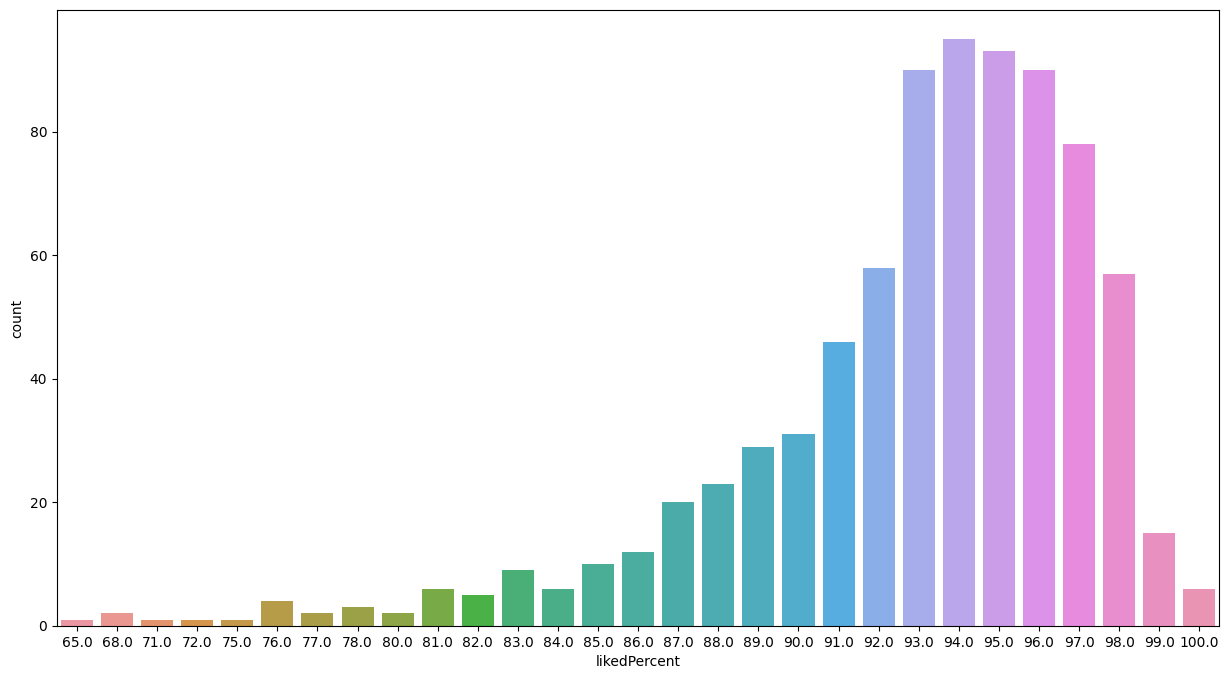

In [ ]:
# To visualize how well balanced the target (dependent variable) is
plt.figure(figsize=(15,8))
sns.countplot(x=df_data['likedPercent'])

<ipython-input-23-418a6b2b0bae>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df_data.corr())
<ipython-input-23-418a6b2b0bae>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_data.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True,


<Axes: >

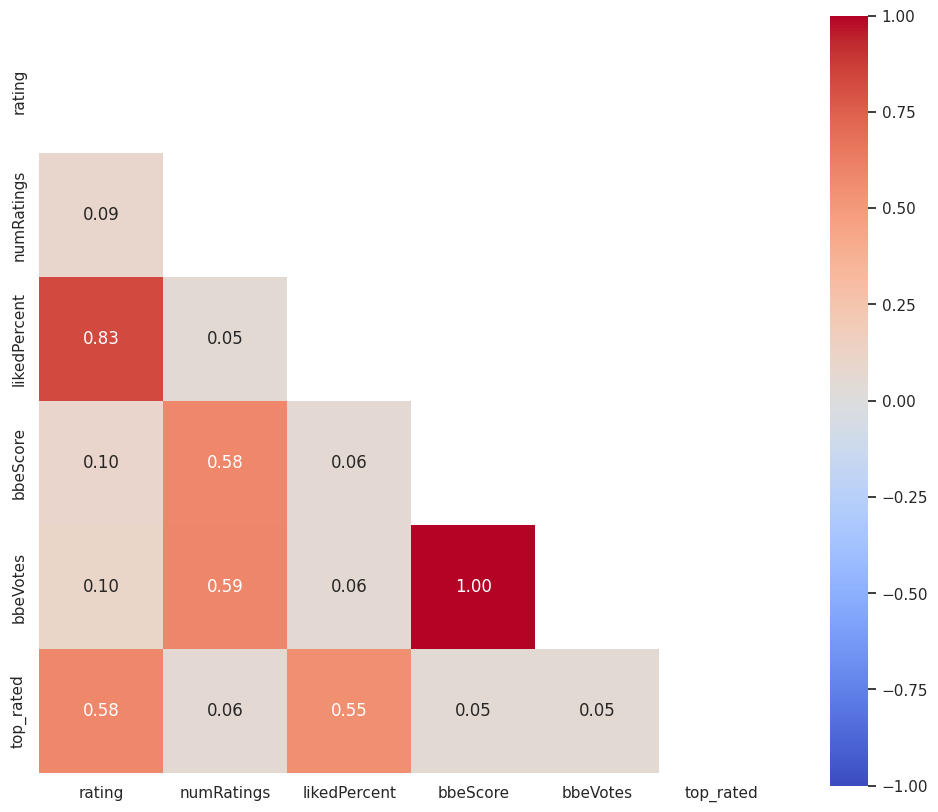

In [ ]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df_data.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(12,10))

# Plot the heatmap
sns.heatmap(df_data.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True,
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label

# sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, square=True,
#                 cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')

# Prevent Heatmap Cut-Off Issue
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

In [ ]:
# Visualize correlations drilled down by dependent variable
#sns.pairplot(df_data, corner=True, hue='genres')

### Step 3: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [ ]:
df_cat = df_data.select_dtypes(include=['object'])
df_cat.nunique()

bookId              796
title               794
series              791
author              637
description         796
language             13
isbn                133
genres              769
characters          404
bookFormat           19
edition             363
pages               396
publisher           455
publishDate         683
firstPublishDate    620
awards              194
ratingsByStars      796
setting             184
coverImg            796
price               549
dtype: int64

In [ ]:
# limit to numerical data using df.select_dtypes()
df_num = df_data.select_dtypes(include=['number'])
df_num.nunique()


rating          130
numRatings      780
likedPercent     29
bbeScore        447
bbeVotes        102
top_rated         5
dtype: int64

In [ ]:
df_data.groupby(by='rating').count().sort_values('rating', ascending=False).head(10)

,bookId,title,series,author,description,language,isbn,genres,characters,bookFormat,...,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,top_rated
rating,,,,,,,,,,,,,,,,,,,,,
4.93,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4.92,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4.74,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4.73,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4.69,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4.66,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4.63,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4.60,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4.59,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_data.groupby(by='likedPercent').count().sort_values('likedPercent', ascending=False).head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,setting,coverImg,bbeScore,bbeVotes,price,top_rated
likedPercent,,,,,,,,,,,,,,,,,,,,,
100.0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
99.0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
98.0,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
97.0,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
96.0,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
95.0,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
94.0,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
93.0,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
92.0,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58


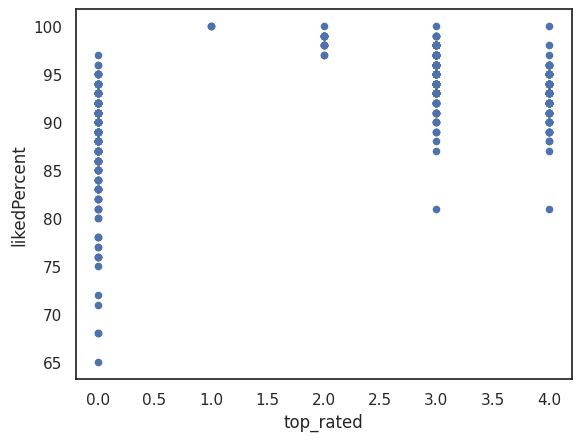

In [ ]:
_ = df_data.plot.scatter('top_rated', 'likedPercent')

<Axes: ylabel='top_rated'>

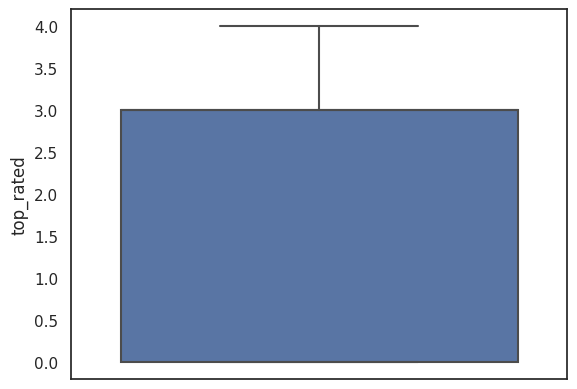

In [ ]:
# Boxplot using Seaborn
sns.boxplot(y='top_rated', data=df_data)

<Axes: xlabel='top_rated', ylabel='likedPercent'>

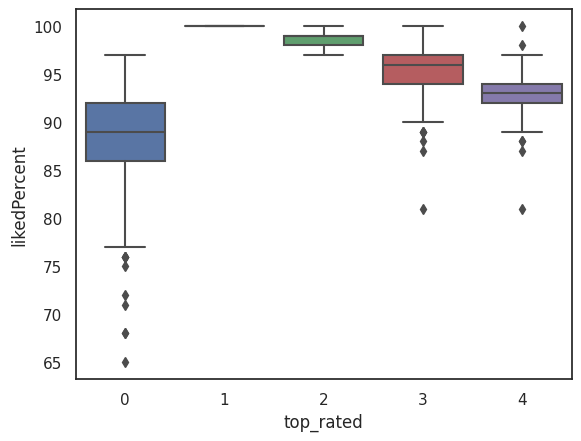

In [ ]:
# Boxplot using Seaborn
sns.boxplot(x='top_rated', y='likedPercent', data=df_data)

In [ ]:
# Boxplot using Seaborn
#sns.boxplot(x='top_rated', y='genres', data=df_data)

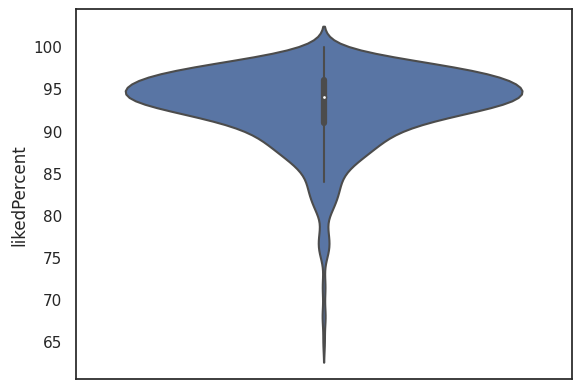

In [ ]:
# Violin plot using Seaborn
_ = sns.violinplot(y='likedPercent', data=df_data)

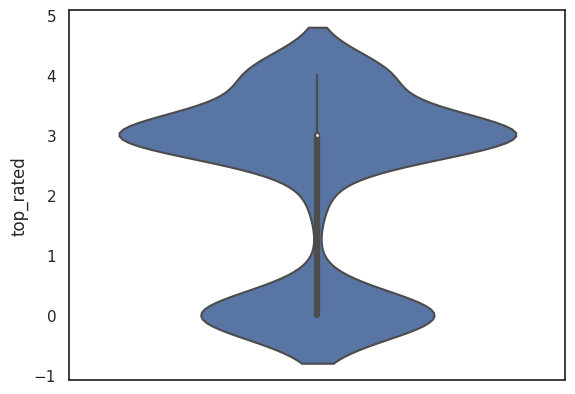

In [ ]:
# Violin plot using Seaborn
_ = sns.violinplot(y='top_rated', data=df_data)

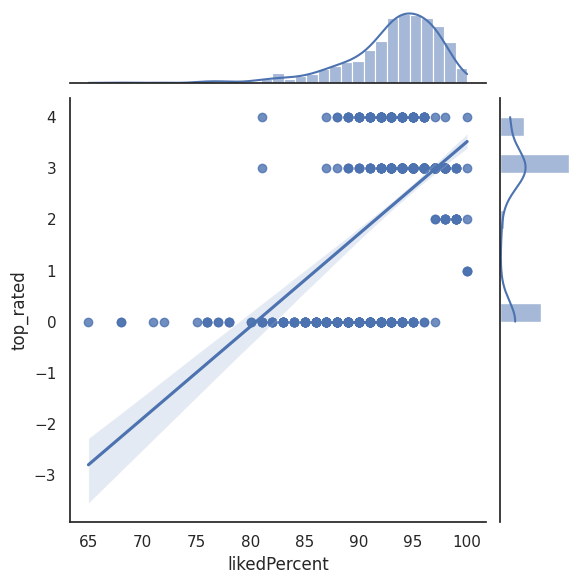

In [ ]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x="likedPercent", y="top_rated", data=df_data, kind="reg")

In [ ]:
df_data.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price', 'top_rated'],
      dtype='object')

In [ ]:
df1 = df_data[['likedPercent', 'numRatings', 'author', 'language', 'bbeScore', 'rating', 'top_rated', 'genres']]
df1.head(70)

,likedPercent,numRatings,author,language,bbeScore,rating,top_rated,genres
1,98.0,2507623,"J.K. Rowling, Mary GrandPré (Illustrator)",English,2632233,4.50,3,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
8,98.0,110146,J.R.R. Tolkien,English,1159802,4.60,2,"['Fantasy', 'Fiction', 'Classics', 'Adventure'..."
29,95.0,1131303,"Orson Scott Card, Stefan Rudnicki (Narrator), ...",English,720651,4.30,3,"['Science Fiction', 'Fiction', 'Young Adult', ..."
37,93.0,938325,"Bram Stoker, Nina Auerbach (Editor), David J. ...",English,646782,4.00,4,"['Classics', 'Horror', 'Fiction', 'Fantasy', '..."
42,95.0,1992300,Rick Riordan (Goodreads Author),English,597132,4.26,3,"['Fantasy', 'Young Adult', 'Mythology', 'Ficti..."
...,...,...,...,...,...,...,...,...
1295,91.0,61768,"Paul Auster, Art Spiegelman (Illustrator), Luc...",English,4112,3.88,0,"['Fiction', 'Mystery', 'American', 'Contempora..."
1307,95.0,73293,Patrick Ness,English,4060,4.20,3,"['Young Adult', 'Science Fiction', 'Dystopia',..."
1334,91.0,481916,Robert Galbraith,English,3934,3.86,0,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'M..."
1335,94.0,66501,Patrick Ness,English,3931,4.24,3,"['Young Adult', 'Science Fiction', 'Dystopia',..."


In [ ]:
# 1)

X = df1.iloc[:,0].values.reshape(-1,1) # input
y = df1.iloc[:,6].values # output (dependent variable)

In [ ]:
#  Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=False, random_state=SEED)

In [ ]:
# Import the linear regression algorithm
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

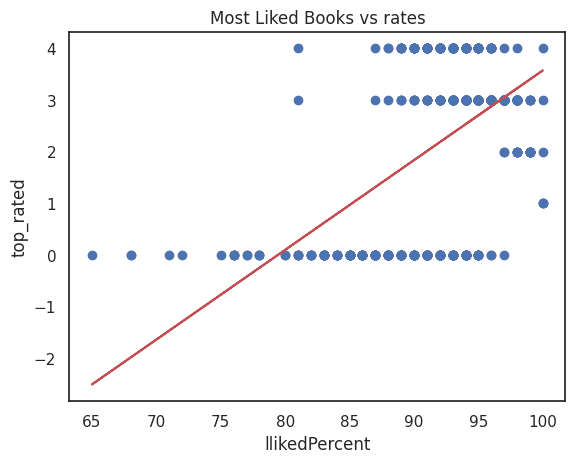

In [ ]:
# y=mx+c (Linear regression model)
line = regressor.coef_*X + regressor.intercept_

# Lets plot this on the scatter plot
plt.scatter(X,y)
plt.plot(X,line, 'r')
plt.xlabel("llikedPercent")
plt.ylabel("top_rated")
plt.title("Most Liked Books vs rates")
plt.show()

In [ ]:
# Testing Model

y_pred = regressor.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test,
                           "Predicted Output": y_pred})

In [ ]:
compare_df

,Desired Output (Actuals),Predicted Output
0,4,2.184993
1,3,2.706234
2,3,3.401222
3,3,2.879981
4,0,1.316257
...,...,...
155,3,3.227475
156,3,2.706234
157,3,3.053728
158,3,2.706234


In [ ]:
# Evaluate Model

#The coefficients
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.2f}'.format(r2_score(y_test, y_pred)))

Coefficients: 
 [0.17374709]
Mean squared error: 1.99
Coefficient of determination: 0.24


In [ ]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(regressor.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(regressor.score(X_test, y_test)))

Regression model's training score = 0.30
Regression model's test score     = 0.24


In [ ]:
# Own Prediction

own_pred = regressor.predict([[4.0]])
print("My target value is = ", str(own_pred[0]))

My target value is =  -13.104750961277615


In [ ]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:50]

,Desired Output (Actuals),Predicted Output
0,4,2.184993
1,3,2.706234
2,3,3.401222
3,3,2.879981
4,0,1.316257
5,0,1.142510
6,3,2.358740
7,3,3.053728
8,0,0.968763
9,3,3.053728


In [ ]:
import pickle
with open('Linear_regression.pkl','wb') as file:
  pickle.dump(regressor, file)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred, target_names= class_names.tolist()))
print()

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification report:



NameError: ignored

### collaborative recommend system

In [ ]:
df_data.info()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(df_data)

In [ ]:

# Create a user-item interaction matrix
interaction_matrix = df_data.pivot(columns='bookId', values='rating')


In [ ]:
# Fill missing values with zeros
interaction_matrix = interaction_matrix.fillna(0)

In [ ]:
# Normalize the interaction matrix by subtracting user mean from each rating
user_means = interaction_matrix.mean(axis=1)
interaction_matrix_normalized = interaction_matrix.sub(user_means, axis=0).fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(interaction_matrix_normalized, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute user-user similarity matrix using cosine similarity
user_similarity_matrix = cosine_similarity(interaction_matrix)

# The user_similarity_matrix contains similarity scores between all pairs of users
# user_similarity_matrix[i][j] represents the similarity between user i and user j



In [ ]:
# Transpose the interaction matrix to create an item-user interaction matrix
item_interaction_matrix = interaction_matrix.T

# Compute item-item similarity matrix using cosine similarity
item_similarity_matrix = cosine_similarity(item_interaction_matrix)

# The item_similarity_matrix contains similarity scores between all pairs of items
# item_similarity_matrix[i][j] represents the similarity between item i and item j


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Create an item-user interaction matrix with ratings as values
item_user_matrix = df_data.pivot(index='bookId', columns = 'user_id', values='rating')

# Compute item-item similarity matrix using cosine similarity
item_similarity_matrix = cosine_similarity(item_user_matrix, item_user_matrix)

# Replace NaN values with zeros in the item similarity matrix
item_similarity_matrix = np.nan_to_num(item_similarity_matrix)

# Choose a target user (e.g., user_id)
target_user_id = 123  # Replace with the actual target user ID

# Get the target user's ratings for all items
target_user_ratings = item_user_matrix[target_user_id]

# Find items similar to the ones the target user has rated
similar_items = []

for item_id, rating in target_user_ratings.items():
    if not pd.isnull(rating):  # Check if the target user has rated the item
        # Get the similarity scores for the item with all other items
        item_similarity_scores = item_similarity_matrix[item_id]

        # Find items most similar to the current item (excluding itself)
        most_similar_items = sorted(enumerate(item_similarity_scores), key=lambda x: x[1], reverse=True)
        most_similar_items = [(item_id, score) for item_id, score in most_similar_items if item_id != item_id]

        # Recommend items similar to the current item
        recommended_items.extend([item_id for item_id, _ in most_similar_items])

# recommended_items now contains book IDs to recommend to the target user




